<a href="https://colab.research.google.com/github/harishmohan60/fastaicourse/blob/main/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 60.4MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
bs =64

In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [8]:
path_annotations = path/'annotations'
path_img = path/'images'


The first thing we do when we approch a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the lables are what some sample images look like. 
The main difference between the handling of image classification datasets is the way lables are stored. In the particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct coategories. Fortunately, the fastai library has a handy function made exactly for this, ImageDataBunch.from_name_re gets the labels from the filenames using reqular expressions.

And set the random seed to two to gurantee that the same validations set is every time. This will give you consistent results with what you see in the lesson video. 

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_181.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_180.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_161.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_116.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_55.jpg')]

In [10]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

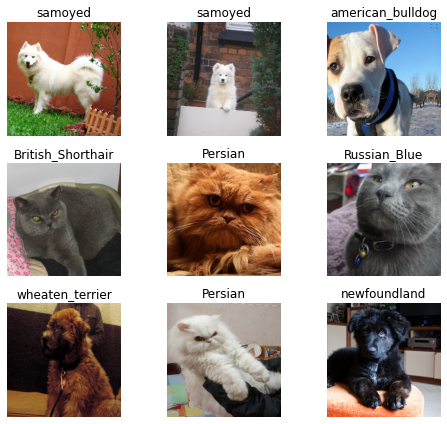

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

### Traning: resnet34
Now we will start training our model. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will drive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as inputs and will output the predicted probaility for each of the categories (in the case, it will have 37 outputs). 

We will train for 4 epochs (4 cycles through all our data)


In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.353134,0.271859,0.092693,00:41
1,0.638238,0.255475,0.079838,00:41
2,0.382948,0.198501,0.067659,00:41
3,0.278981,0.196276,0.061570,00:41


In [16]:
learn.save('stage-1')

# Result
Let's see what results you got. 
We will first see which were the categorical that the model confused with one another. We will try to see if what the model predicted was resonable or no. In the case the mistakes look resonable (none of the mistakes seems obviously navie). This is an indicator that our classifer is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour. 

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

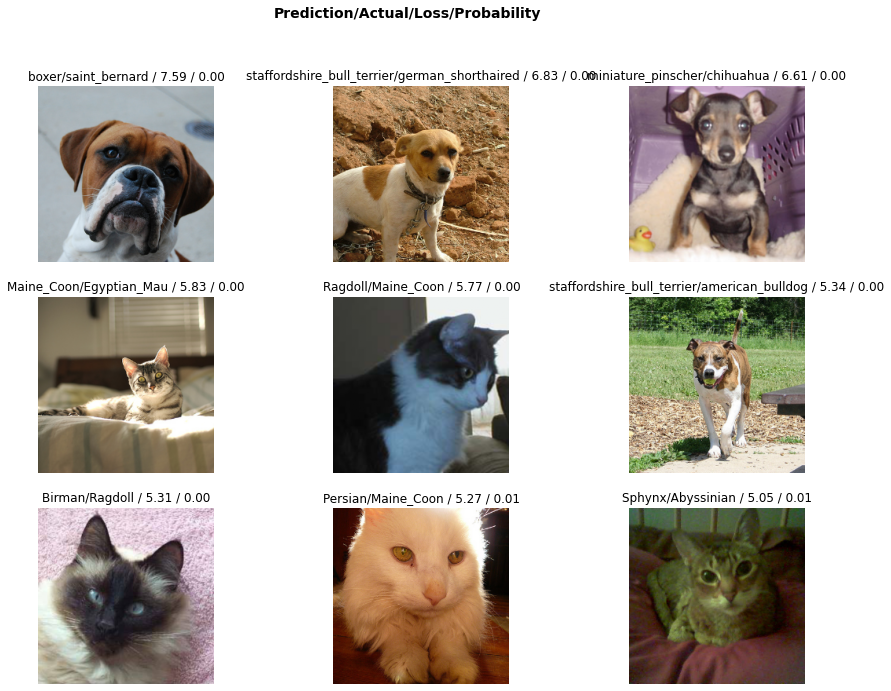

In [18]:
interp.plot_top_losses(9, figsize=(15, 11))

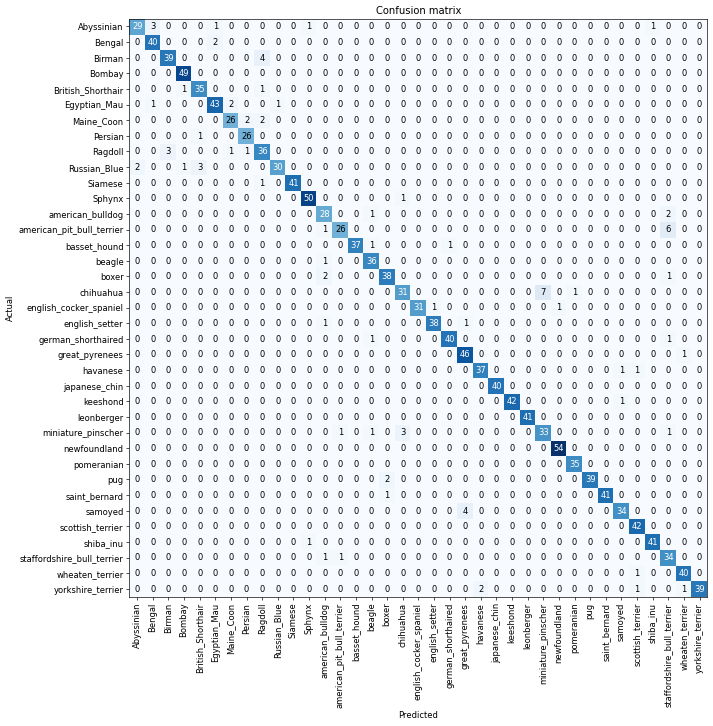

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[('chihuahua', 'miniature_pinscher', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Birman', 'Ragdoll', 4),
 ('samoyed', 'great_pyrenees', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('pug', 'boxer', 2),
 ('yorkshire_terrier', 'havanese', 2)]

# Unfreezing, fine-tuning, and learning rates
Since our model is working as we expect it to, we will unfreeze our model and train some more. 

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.692265,0.336915,0.106901,00:41


In [24]:
learn.load('stage-1');

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


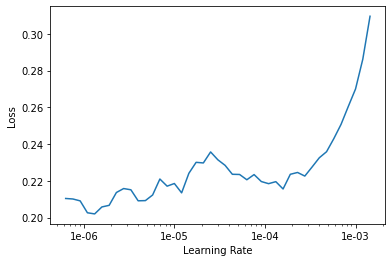

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.251939,0.189602,0.058863,00:41
1,0.212803,0.183244,0.056157,00:42


# Training: resnet50
Now we will train in the same way as before but with one caveat;L instead of using resnet34 as our backbone we will use resent50 (resnet34 is 34 layers residual network while resent50 has 50 layers. 

Basically, resnet50 usually performs better because it is deep network with more parameters. Let's see if we can achieve a higher performance here. To help it alongm let's us large images too. Since that way the network can see more detail. We reduce the batch sice a bit  since otherwise this large netowrk will require more GPU memory. 

In [30]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [32]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


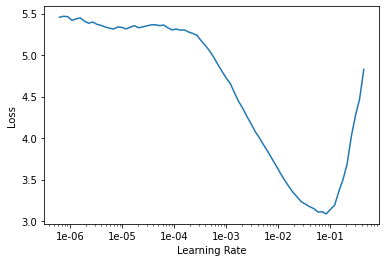

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.718928,0.296461,0.098782,00:58
1,0.524875,0.335612,0.104195,00:57
2,0.401378,0.243749,0.080514,00:57
3,0.321692,0.225361,0.073072,00:58
4,0.252558,0.162592,0.061570,00:59
5,0.178968,0.164657,0.054804,00:58
6,0.136891,0.140502,0.053451,00:57
7,0.111358,0.135114,0.050744,00:58


In [ ]:
learn.save('stage-1-50')

It's astonshing that it's possible to recognize pet breeds so accuratly! Let's see if full fine-turining helps:

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

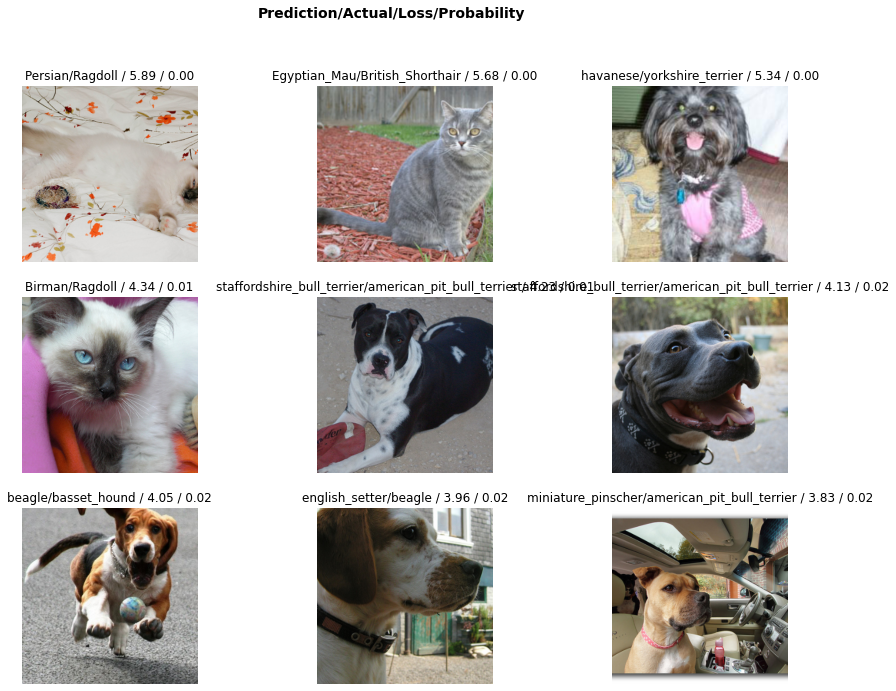

In [38]:
interp.plot_top_losses(9, figsize=(15,11))

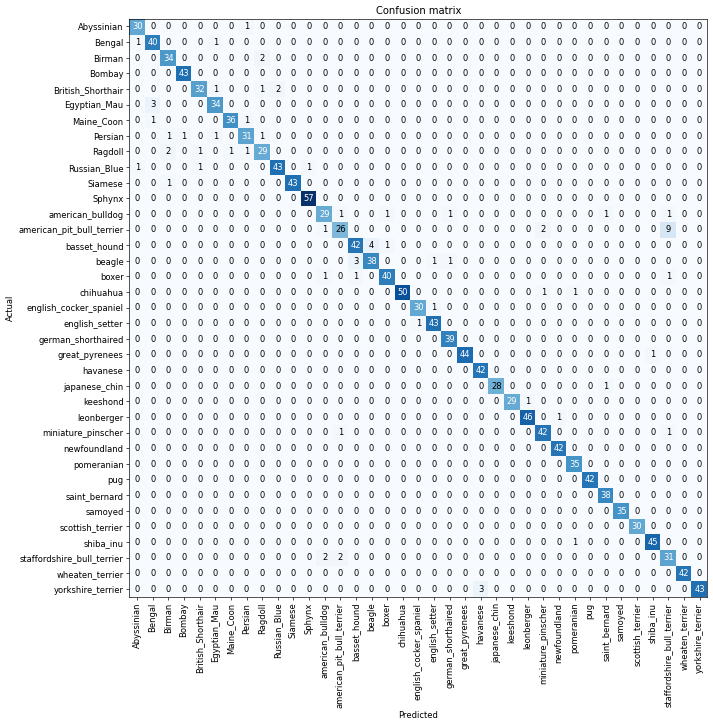

In [39]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [40]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('basset_hound', 'beagle', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('beagle', 'basset_hound', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Ragdoll', 'Birman', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

# Unfreezing, fine-turning, and learning rate
Since our model is working as we expect it to, we will unfreeze our model and train some more. 

In [41]:
learn.unfreeze()

In [43]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.768091,0.332585,0.102842,01:01


In [45]:
learn.load('stage-1');

RuntimeError: ignored

In [46]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


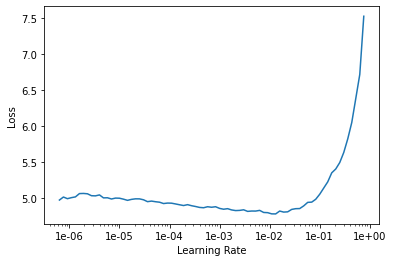

In [47]:
learn.recorder.plot()

In [48]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,4.621202,4.733471,0.962111,01:01
1,4.440331,4.434001,0.956022,01:00


# Training: resnet50
Now we will train in the same way as before but with one caveat: instead of using resent34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers.

Basically, resent50 usually performs better because it is a deeper network will more parameters. Let's see if we can achieve a higher performance here. To help it along let's use large images too, since that way the network can see detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [51]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [53]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [54]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


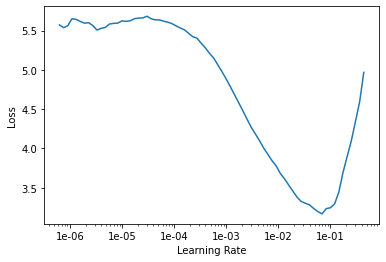

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.739827,0.269484,0.090663,00:58
1,0.506253,0.293461,0.085250,00:57
2,0.419608,0.287020,0.076455,00:56
3,0.336453,0.256533,0.073072,00:57
4,0.236277,0.230493,0.064953,00:57
5,0.180688,0.179212,0.054804,01:00
6,0.143199,0.162916,0.048714,01:00
7,0.099544,0.164123,0.046008,00:59


In [57]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.121298,0.171889,0.044655,01:03
1,0.120914,0.160155,0.043978,01:02
2,0.083670,0.157664,0.043302,01:02


# Other Data formats


In [60]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [61]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

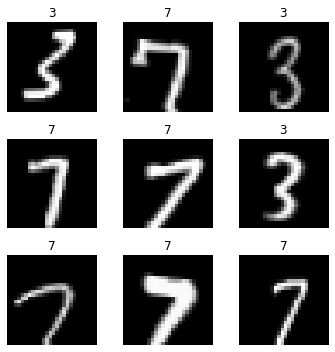

In [62]:
data.show_batch(rows=3, figsize=(5,5))

In [64]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit

<bound method Learner.fit of Learner(data=ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [65]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


[0, 1]

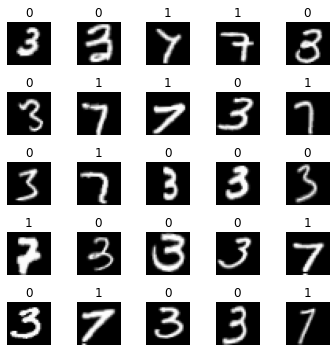

In [66]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)
data.show_batch(row=3, figsize=(5,5))
data.classes

In [67]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [69]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [70]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [71]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
                                     label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [75]:
lables = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
lables[:5]

['3', '3', '3', '3', '3']

In [79]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']